## 1. 准备运行环境
我们建议您使用一个新的虚拟环境运行以下下代码，以免和您既有工程产生冲突。另行，以下内容是基于Mac M系列芯片，请确保您使用的电脑非Intel 的CPU。

In [1]:
%pip install -q "diffusers" "ipywidgets" "transformers >= 4.31" -i https://pypi.tuna.tsinghua.edu.cn/simple

Note: you may need to restart the kernel to use updated packages.


> 如果安装速度比较慢，可以使用 -i 国内源进行安装，例如：
> pip install diffusers -i https://pypi.tuna.tsinghua.edu.cn/simple

In [2]:
%pip install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cpu

Looking in indexes: https://download.pytorch.org/whl/nightly/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 MB 314.2 kB/s eta 0:00:0000:0100:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 328.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 348.4 kB/s eta 0:00:00a 0:00:01
  Using cached https://download.pytorch.org/whl/nightly/sympy-1.11.1-py3-none-any.whl (6.5 MB)
  Using cached https://download.pytorch.org/whl/nightly/networkx-3.0rc1-py3-none-any.whl (2.0 MB)
  Using cached https://download.pytorch.org/whl/nightly/mpmath-1.2.1-py3-none-any.whl (532 kB)
Note: you may need to restart the kernel to use updated packages.


## 2. 导入`warnings`库，可以忽略运行中尝试的一些井道信息，这些是警告，而不会影响我们代码的运行

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 3. 快速上手体验
下面的代码演示了如何使用stable-diffusion-2-1创建StableDiffusionPipeline

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

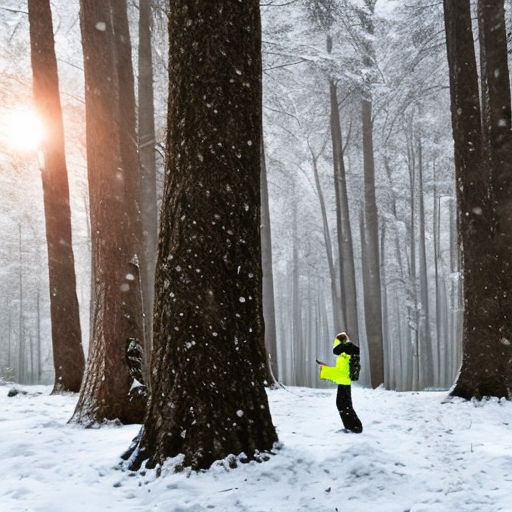

In [6]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base").to("mps")

# for reducing memory consumption get all components from pipeline independently
text_encoder = pipe.text_encoder
text_encoder.eval()
unet = pipe.unet
unet.eval()
vae = pipe.vae
vae.eval()

conf = pipe.scheduler.config

del pipe